In [33]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from numpy import transpose
from sklearn.manifold import TSNE

In [29]:
data = pd.read_csv("csgo_round_snapshots.csv")

datamapset = list(set(data.map)) #получаем лист возможных вариантов для столбца map
datamapdict = {i:datamapset.index(i) for i in datamapset} #создаем словарь ключ строка значение число
data["map"] = data["map"].map(lambda x: datamapdict[x]) #заменяем строковые значения на числовые

data.bomb_planted = data.bomb_planted.map(lambda x: str(x)) #приводим значения к строковому виду (from numpy.bool)
dataplantset = list(set(data.bomb_planted)) #получаем лист возможных вариантов для столбца bomb_planted
dataplantdict = {i:dataplantset.index(i) for i in dataplantset} #создаем словарь ключ строка значение число
data.bomb_planted = data.bomb_planted.map(lambda x: dataplantdict[x]) #заменяем строковые значения на числовые

data.round_winner = data.round_winner.map(lambda x:0 if x=="CT" else 1) #заменяем строковые значения на числовые

pca = PCA(n_components=2)
data_vis = pd.DataFrame(pca.fit_transform(data.drop("round_winner",axis=1).values))

In [31]:
data_vis = data
target = data_vis["round_winner"]
f = lambda x: 'g' if x==1 else 'r'
color_target = [f(i) for i in target]
data_vis = data_vis.drop("round_winner", axis=1)
pca = PCA(n_components=2)
data_vis =pca.fit_transform(data.drop("round_winner",axis=1).values)

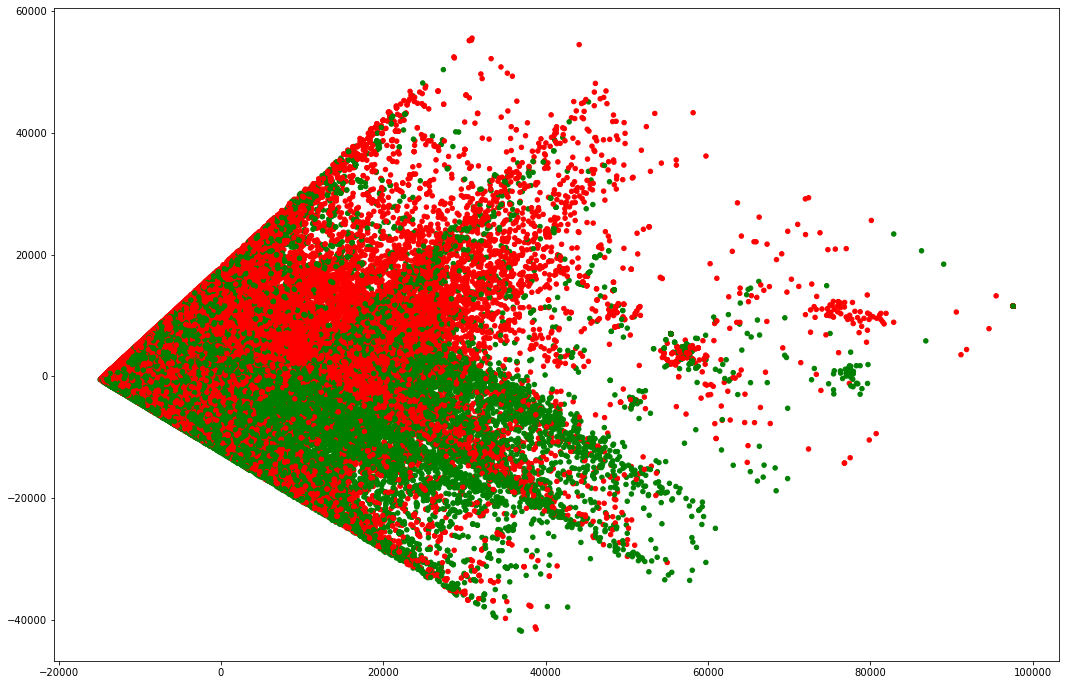

In [38]:
plt.rcParams["figure.figsize"] = 18,12
plt.scatter([i[0] for i in data_vis], [i[1] for i in data_vis], c = color_target, s = 20)
plt.savefig("data_vis.png")

In [40]:
data.round_winner.describe()

count    122410.000000
mean          0.509811
std           0.499906
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: round_winner, dtype: float64

# Выбираем метрику accuracy, так как классов всего два и они равные

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer

In [42]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,0,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,0,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,0,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,0,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [43]:
X_train, y_train = data.drop("round_winner",axis=1)[:100000], data.round_winner[:100000]
X_test, y_test = data.drop("round_winner",axis=1)[100000:], data.round_winner[100000:]

In [59]:
linreg = LinearRegression()
mlpcl = MLPClassifier()
knn = KNeighborsClassifier(n_neighbors=40, n_jobs=-1)

In [55]:
linreg = linreg.fit(X_train, y_train)
pred_linreg = linreg.predict(X_test)
pred_linreg = list(map(lambda x: 1 if x > 0.5 else 0, pred_linreg))
acc_linreg = accuracy_score(y_test, pred_linreg)
print(acc_linreg)

0.740339134315038


In [56]:
mlpcl = mlpcl.fit(X_train, y_train)
pred_mlpcl = mlpcl.predict(X_test)
acc_mlpcl = accuracy_score(y_test, pred_mlpcl)
print(acc_mlpcl)

0.6958500669344043


In [60]:
knn = knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn)
print(acc_knn)

0.688487282463186


In [58]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

In [64]:
pipline = Pipeline([
                    ('normalization', Normalizer()),
                    ('decomposition', PCA(30)),
                    ('model', KNeighborsClassifier(n_neighbors=40))
                   ])